In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load each CSV file individually using pd.read_csv()
df_2019 = pd.read_csv("Clean_Census_Data/Clean_2019.csv")
df_2020 = pd.read_csv("Clean_Census_Data/income_vs_home_rent.csv")  # Different structure
df_2021 = pd.read_csv("Clean_Census_Data/Clean_2021.csv")
df_2022 = pd.read_csv("Clean_Census_Data/Clean_2022.csv")
df_2023 = pd.read_csv("Clean_Census_Data/Clean_2023.csv")

In [7]:
#Define Columns to keep in each dataframe
columns_to_keep = {
    "df_2019": ["Geographic Area Name", "Median (dollars)"],
    "df_2020": ["County", "Median Gross Rent"],
    "df_2021": ["Geographic Area Name", "Median (dollars)"],
    "df_2022": ["Geographic Area Name", "Median (dollars)"],
    "df_2023": ["Geographic Area Name", "Median (dollars)"]
}

In [8]:
# To specify only 2020 data from income_vs_home.csv
df_2020 = df_2020[df_2020["Year"] == 2020].copy()

In [9]:
# Filter each DataFrame (.copy is needed to create a copy of the new columns to keep, which then allows renaming)
df_2019 = df_2019[columns_to_keep["df_2019"]].copy()
df_2020 = df_2020[columns_to_keep["df_2020"]].copy()
df_2021 = df_2021[columns_to_keep["df_2021"]].copy()
df_2022 = df_2022[columns_to_keep["df_2022"]].copy()
df_2023 = df_2023[columns_to_keep["df_2023"]].copy()

In [10]:
# Standardize Column Names
rename_columns = {
    "Geographic Area Name": "County",
    "County": "County",
    "Median (dollars)": "Median Rent",
    "Median Gross Rent": "Median Rent"
}

#Applying the rename
df_2019.rename(columns=rename_columns, inplace=True)
df_2020.rename(columns=rename_columns, inplace=True)
df_2021.rename(columns=rename_columns, inplace=True)
df_2022.rename(columns=rename_columns, inplace=True)
df_2023.rename(columns=rename_columns, inplace=True)

In [11]:
# Assign a fixed "Year" value corresponding to the datasets. This will make graphing easier.

df_2019["Year"] = 2019
df_2020["Year"] = 2020
df_2021["Year"] = 2021
df_2022["Year"] = 2022
df_2023["Year"] = 2023

In [12]:
# Merge All Datasets into one DataFrame
# Using .conat() instead of .gropby() since it is better at merging entire datasets.
df_all = pd.concat([df_2019, df_2020, df_2021, df_2022, df_2023])

# Drop ", Oregon" from County Column
df_all["County"] = df_all["County"].str.replace(", Oregon", "", regex=False)

In [13]:
# Including YoY % Increase
df_all = df_all.sort_values(by=["County", "Year"]) # Ensure Df is sortd before calculating percent change

df_all["YoY % Change"] = df_all.groupby("County")["Median Rent"].pct_change() * 100  # Establishing the YoY calculation

df_all["YoY % Change"].fillna(0, inplace=True)  # Dropping NaN value

C:\Users\devin\AppData\Local\Temp\ipykernel_7884\733102383.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_all["YoY % Change"].fillna(0, inplace=True)  # Dropping NaN value


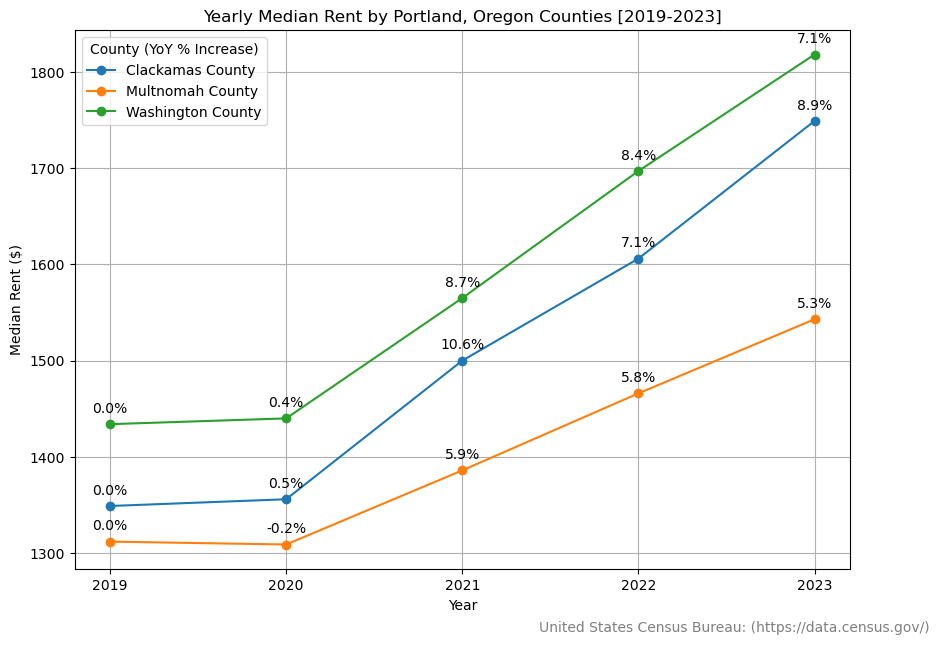

In [14]:
# Plotting The Line
plt.figure(figsize=(10,7))

for County in df_all["County"].unique(): 
    subset = df_all[df_all["County"] == County]
    plt.plot(subset["Year"], subset["Median Rent"], marker="o", linestyle="-", label=County)

    # Add % change labels above each marker (Fixed: Use `pct`)
    for x, y, pct in zip(subset["Year"], subset["Median Rent"], subset["YoY % Change"]):
        plt.text(x, y + 12, f"{pct:.1f}%", fontsize=10, ha="center")  # Corrected to use `pct`

# Customizations
plt.title("Yearly Median Rent by Portland, Oregon Counties [2019-2023]")
plt.xlabel("Year")
plt.ylabel("Median Rent ($)")
plt.legend(title="County (YoY % Increase)")
plt.grid(True)

# Raise the graph by a bit

# Citation
plt.figtext(0.98, 0.02, "United States Census Bureau: (https://data.census.gov/)", fontsize=10, ha="right", color="gray")

# Setting x-axis to whole year increments
plt.xticks(ticks=sorted(df_all["Year"].unique()), labels=sorted(df_all["Year"].unique()))

plt.savefig("median_rent_USCensus.png", dpi=300, bbox_inches="tight")

plt.show()
